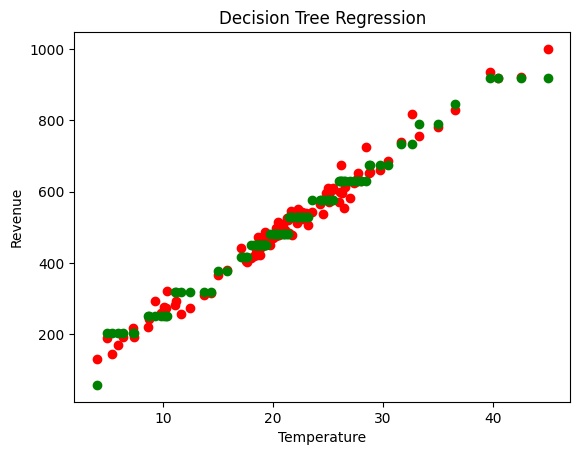

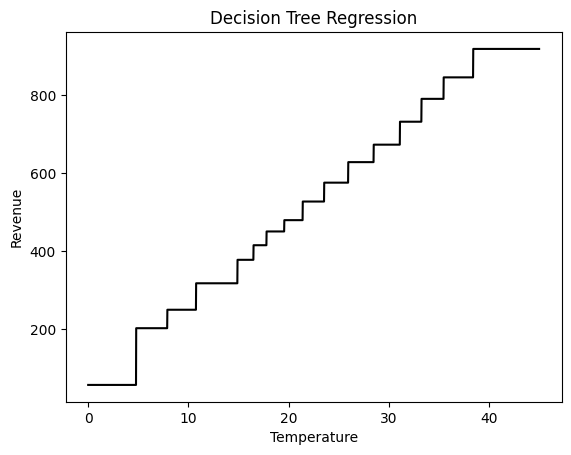

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

dataset.head(5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=4)
modelo = regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = modelo.predict(X_test.reshape(-1,1))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, modelo.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [6]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Eficiencia:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 24.08086699211367
Mean Squared Error: 991.3757109713657
Root Mean Squared Error: 31.48611933807286
Eficiencia: 0.9680164814473674


In [7]:
y.mean()

521.57077669154

In [8]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,477.841719,479.769562
1,474.832244,450.809606
2,603.324631,575.849113
3,437.828710,450.809606
4,145.625302,202.927850
...,...,...
95,554.742974,628.434284
96,463.065614,450.809606
97,192.341996,202.927850
98,599.278277,628.434284


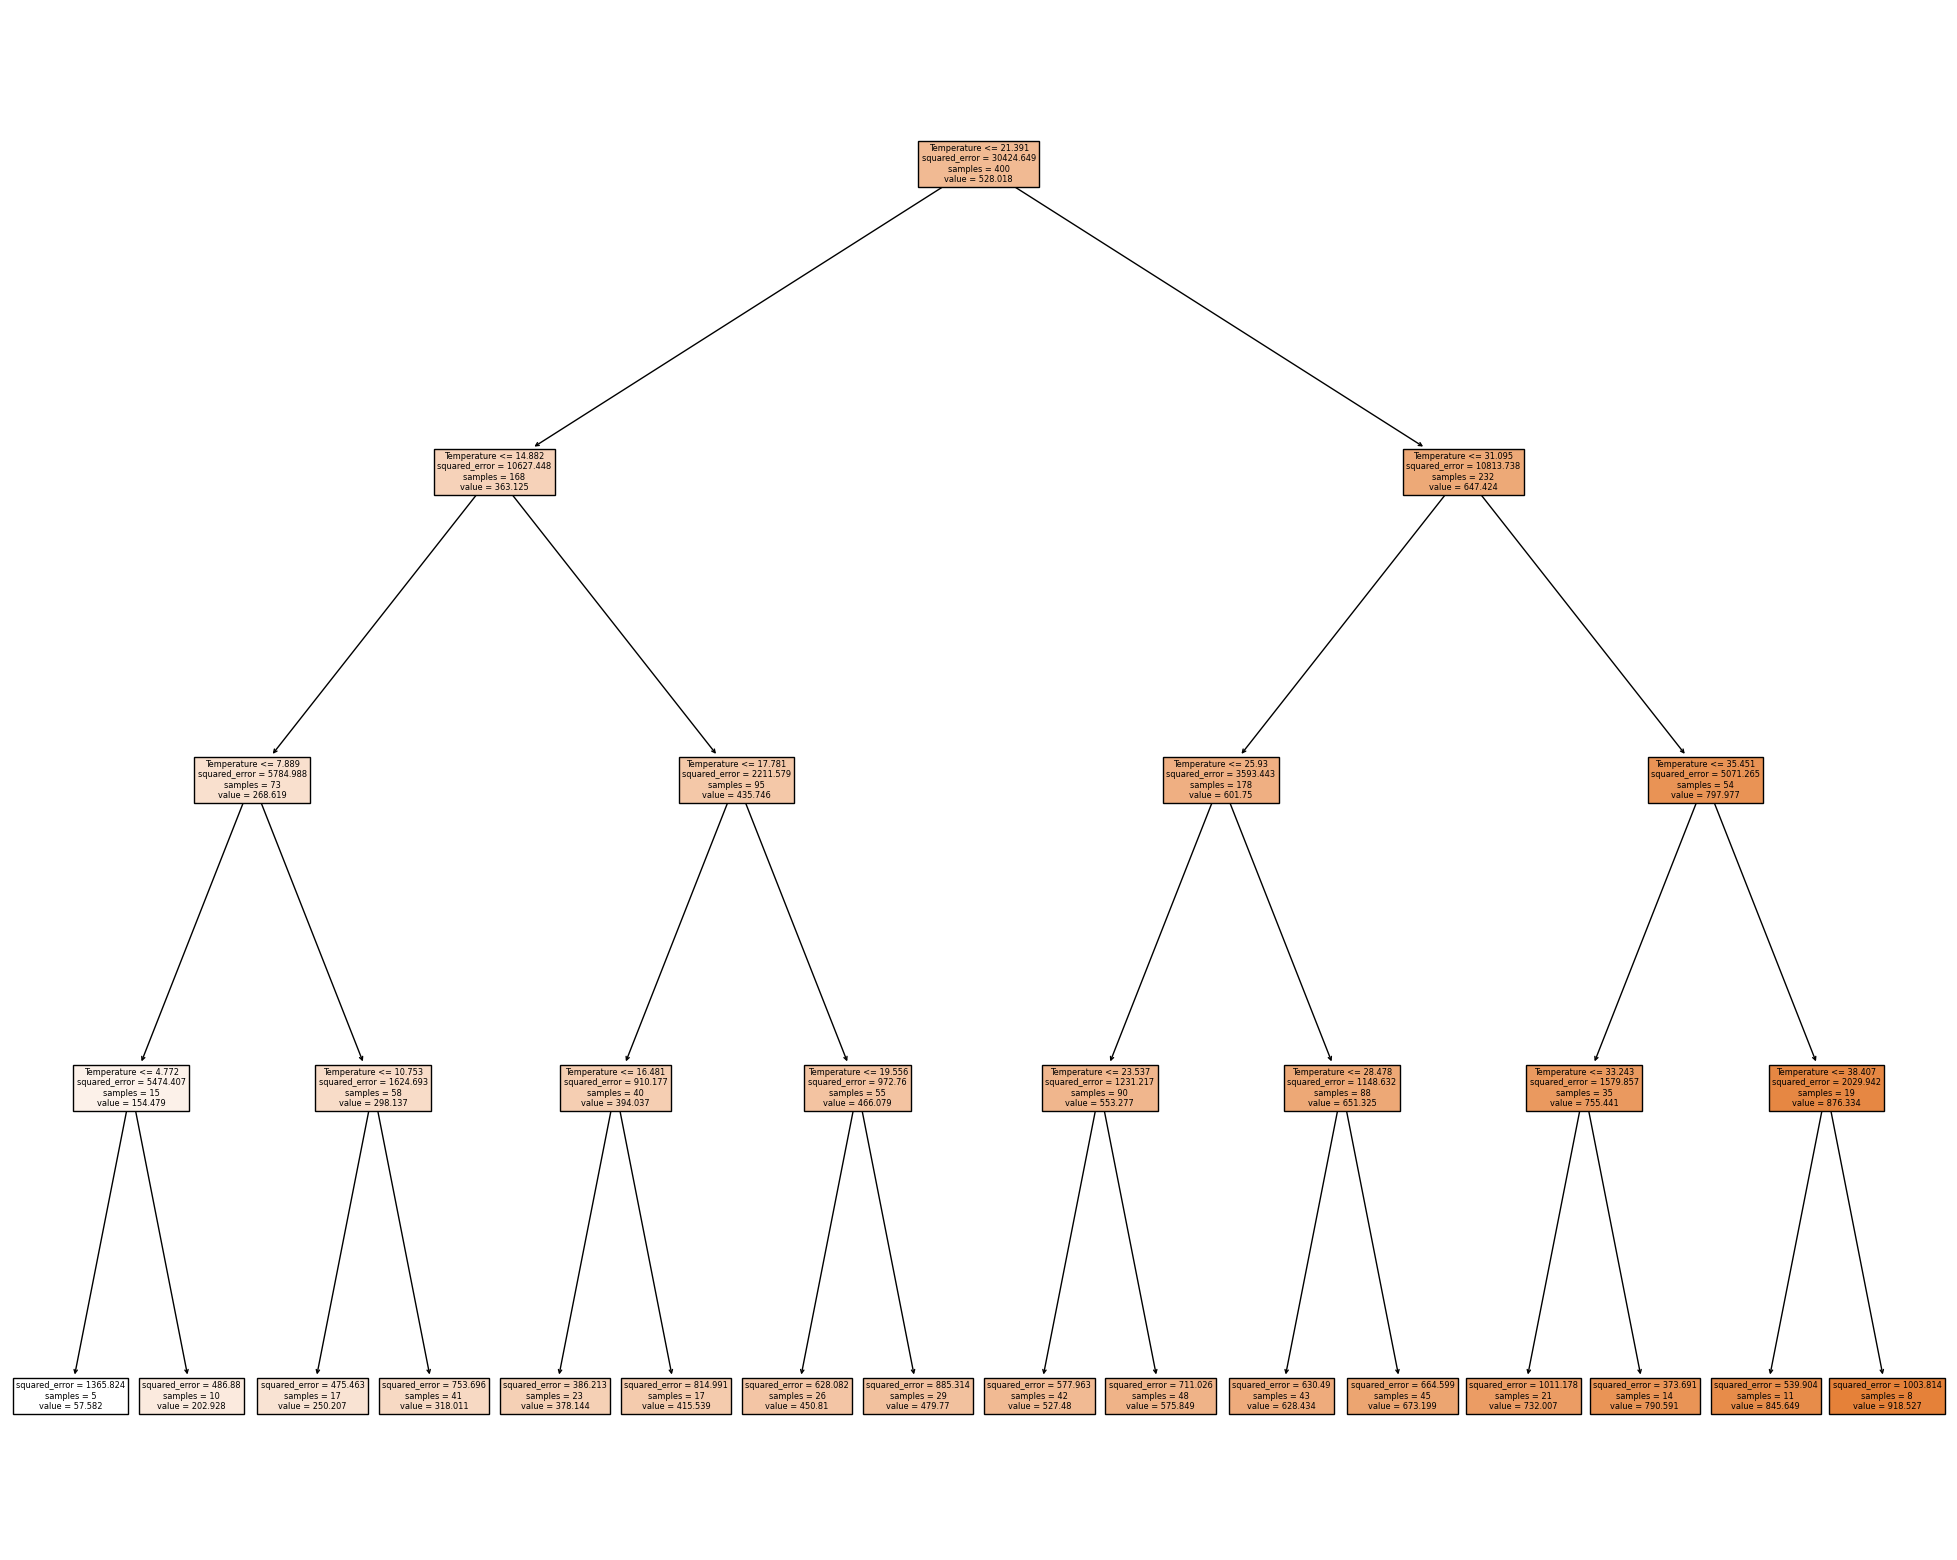

In [9]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelo, feature_names=dataset.columns, filled=True)